In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
N_THREADS = 20
N_RUNS_PER_THREAD = 5
file400 = 'times.txt'
file100 = 'times100.txt'

In [105]:
def plot_exec_time(times: list, ax, n_bodies):
    ax.plot(range(1, N_THREADS + 1), times)
    ax.set_xlabel('number of threads')
    ax.set_ylabel('seconds')
    ax.set_title(f'Execution time ({n_bodies} bodies)')
    ax.set_xticks([i for i in range(1, N_THREADS + 1)], [i for i in range(1, N_THREADS + 1)])
    ax.grid(True)

In [106]:
def plot_speedup(speedups: list, ax, n_bodies):
    ax.plot(range(1, N_THREADS + 1), speedups)
    ax.set_xlabel('number of threads')
    ax.set_ylabel('speedup')
    ax.set_title(f'Speedup ({n_bodies} bodies)')
    ax.set_xticks([i for i in range(1, N_THREADS + 1)], [i for i in range(1, N_THREADS + 1)])
    ax.grid(True)

In [107]:
def plot_efficiency(efs: list, ax, n_bodies):
    ax.plot(range(1, N_THREADS + 1), efs)
    ax.set_xlabel('number of threads')
    ax.set_ylabel('effectiveness')
    ax.set_title(f'Effectiveness ({n_bodies} bodies)')
    ax.set_xticks([i for i in range(1, N_THREADS + 1)], [i for i in range(1, N_THREADS + 1)])
    ax.grid(True)

In [108]:
def get_plots():
    times400 = []
    times100 = []

    with open(file400) as f:
        for i in range(N_THREADS):
            i_threads_times = []
            for __ in range(N_RUNS_PER_THREAD):
                cur_t = float(f.readline())
                i_threads_times.append(cur_t)
            times400.append(np.mean(i_threads_times))
            
    with open(file100) as f:
        for i in range(N_THREADS):
            i_threads_times = []
            for __ in range(N_RUNS_PER_THREAD):
                cur_t = float(f.readline())
                i_threads_times.append(cur_t)
            times100.append(np.mean(i_threads_times))
            
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(12)
    plot_exec_time(times400, ax1, 400)
    plot_exec_time(times100, ax2, 100)
    plt.show()
    
    
    speedups400 = list(map(lambda t: times400[0] / t, times400))
    speedups100 = list(map(lambda t: times100[0] / t, times100))

    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(12)
    plot_speedup(speedups400, ax1, 400)
    plot_speedup(speedups100, ax2, 100)
    plt.show()
    
    efs400 = []
    for i, sp in enumerate(speedups400):
        efs400.append(sp / (i + 1))
        
    efs100 = []
    for i, sp in enumerate(speedups100):
        efs100.append(sp / (i + 1))

    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(12)
    plot_efficiency(efs400, ax1, 400)
    plot_efficiency(efs100, ax2, 100)
    plt.show()
    
    

The amount of iterations is 10000 with each amount of bodies

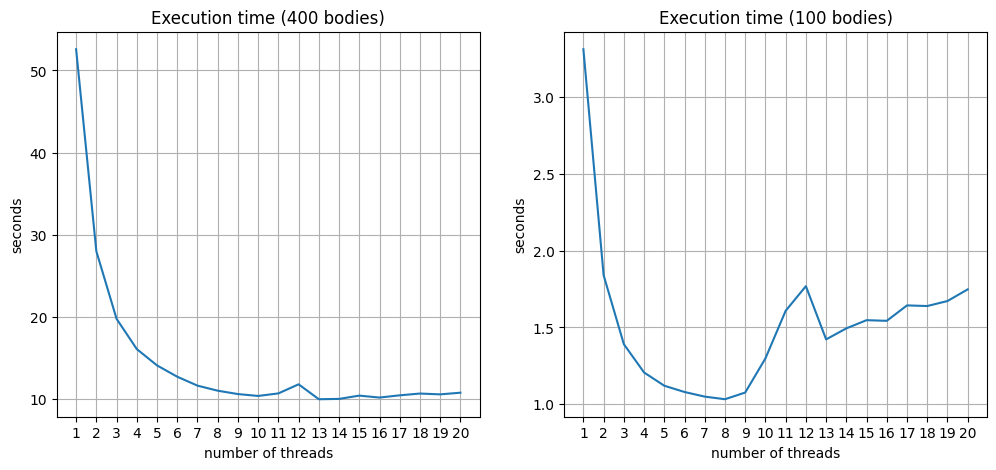

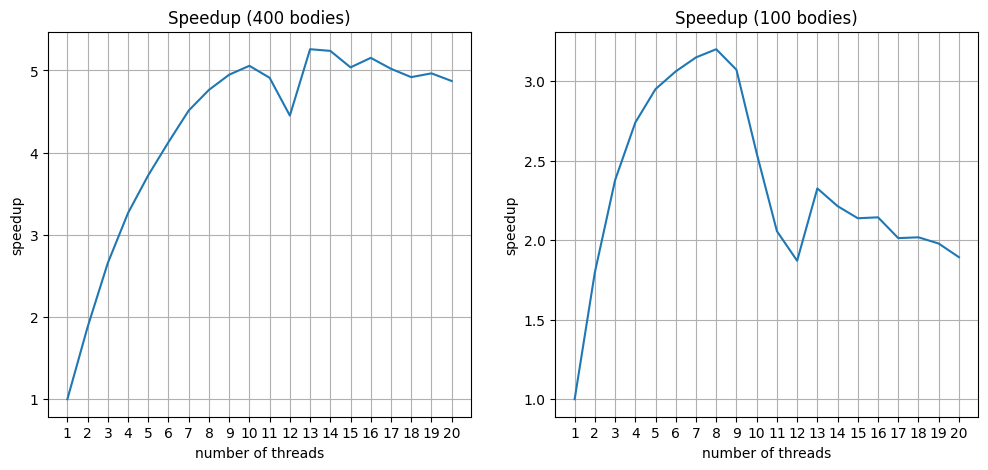

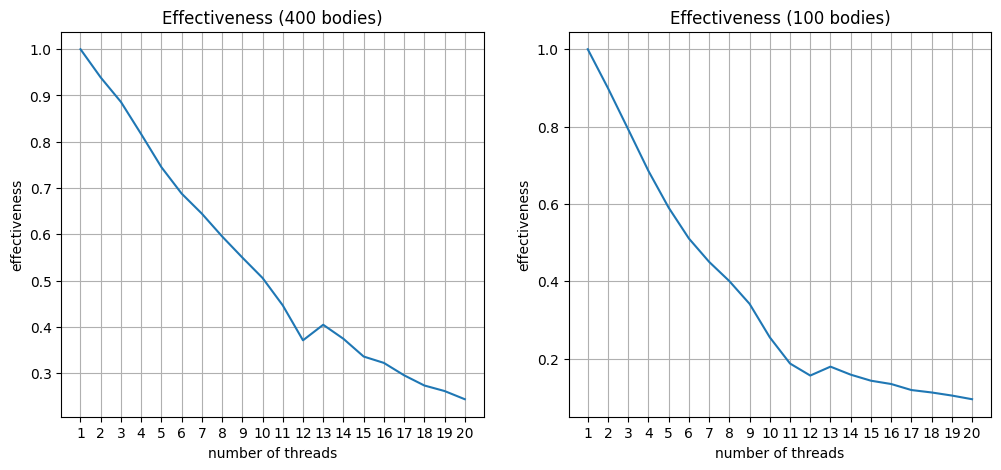

In [109]:
get_plots()